# 4.0.0-Integration

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-27"

## Introduction

Integrate all fractions together 

## Libraries

In [2]:
options(warn = -1, verbose = FALSE)
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(ggplot2)
library(cowplot)
library(dplyr)
library(harmony)
library(dittoSeq)
library(scater) 
library(scran)
}))

In [3]:
#here::dr_here(show_reason = TRUE)
source(here::here("SCGRES_124_125/sc_analysis/misc/paths.R"))
source(here::here("utils/bin.R"))

"{annot}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{annot}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [4]:
ctr_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_41BBctr.rds")))
ctr_obj <- RenameCells(ctr_obj, add.cell.id = "41BBctr")

neg_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_41BBneg.rds")))
neg_obj <- RenameCells(neg_obj, add.cell.id = "41BBneg")

pos_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_41BBpos.rds")))
pos_obj <- RenameCells(pos_obj, add.cell.id = "41BBpos") 

In [5]:
list_objects <- list("Crt"=ctr_obj,
                     "41BBNeg"=neg_obj,
                     "41BBPos"=pos_obj)
naming = names(list_objects)

In [6]:
list_hvg <- lapply(list_objects, function(obj) {
    VariableFeatures(obj)
})

In [7]:
list_hvg <- c(list_hvg[[1]], list_hvg[[2]], list_hvg[[3]])
length(list_hvg)

[1] 1686

In [8]:
hvgs <- unique(list_hvg)
length(hvgs)

[1] 1381

In [9]:
seurat_obj <- merge(
  x = list_objects[[1]],
  y = list_objects[2:length(list_objects)])

## Normalization and Embedding

In [10]:
seurat_obj <- NormalizeData(
seurat_obj,
  normalization.method = "LogNormalize",
  scale.factor = 1e4
)

VariableFeatures(seurat_obj) <- hvgs

seurat_obj <- seurat_obj %>%
  ScaleData(features=hvgs) %>% 
  RunPCA(features=hvgs)

Centering and scaling data matrix

PC_ 1 
Positive:  TPT1, RPL10, IL7R, FTL, LTB, GIMAP7, TXNIP, TC2N, ISG20, FCMR 
	   RIPOR2, IFITM1, SELL, LEF1, EEF1B2, AL138963.4, NOSIP, CCR7, GIMAP4, S100A4 
	   IFITM2, FYB1, SLFN5, CD27, PASK, CD7, NELL2, TCF7, TIMP1, MALAT1 
Negative:  TOP2A, UBE2C, RRM2, ASPM, KIFC1, CDK1, GTSE1, BIRC5, DLGAP5, MKI67 
	   NUSAP1, NCAPG, KNL1, CENPF, CKAP2L, TPX2, CDCA2, CDCA8, KIF15, HJURP 
	   HMMR, CCNB2, SPC25, TUBA1B, STMN1, DIAPH3, KIF23, CDCA3, KIF4A, CDKN3 
PC_ 2 
Positive:  IFITM1, TPT1, IL7R, GIMAP7, HJURP, MXD3, HIST1H3B, CDK1, CKAP2L, KIFC1 
	   KNL1, HIST1H3C, CDCA3, KIF23, TOP2A, UBE2C, KIF15, CDCA8, TC2N, KIF14 
	   HIST1H2AL, NUSAP1, HIST1H3G, IFITM2, GTSE1, SPC25, ASPM, RIPOR2, CDCA2, KIF11 
Negative:  TNFRSF9, CRTAM, SEMA4A, CCL1, EBI3, EGR2, TIE1, TNFRSF4, LINC02341, XCL2 
	   CSF2, DPF3, AFAP1L2, MB, FABP5, XCL1, SQLE, RGS16, AHI1, GZMB 
	   SDC4, DUSP4, CD82, SMS, ENTPD1, GEM, LAIR2, TIGIT, TNFRSF1B, CLNK 
PC_ 3 
Positive:  EEF1B2, RPLP0, R

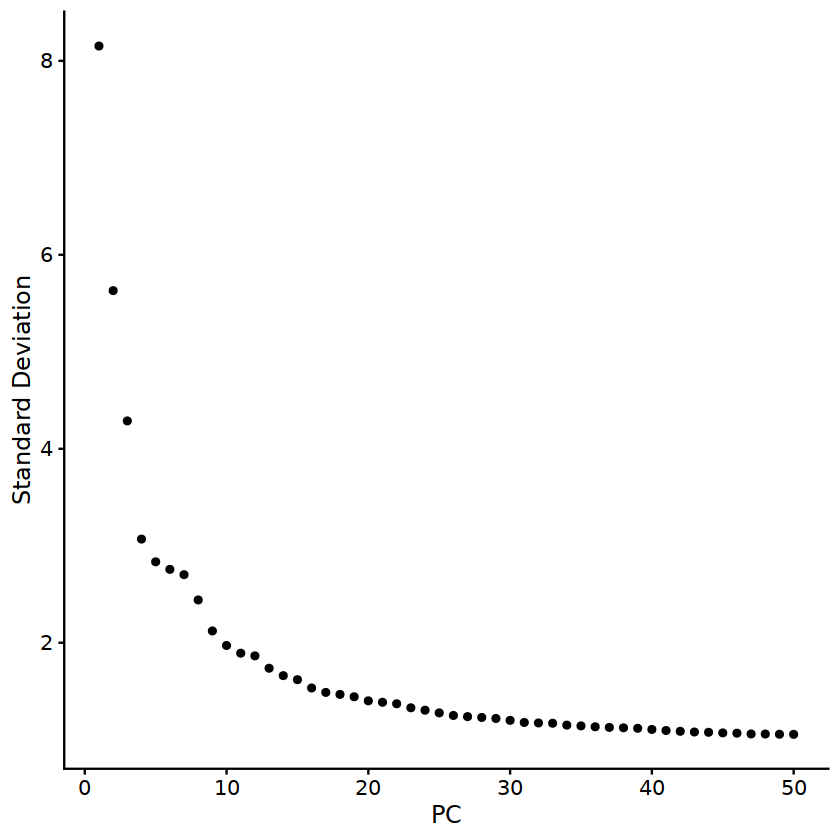

In [11]:
ElbowPlot(seurat_obj, n=50)

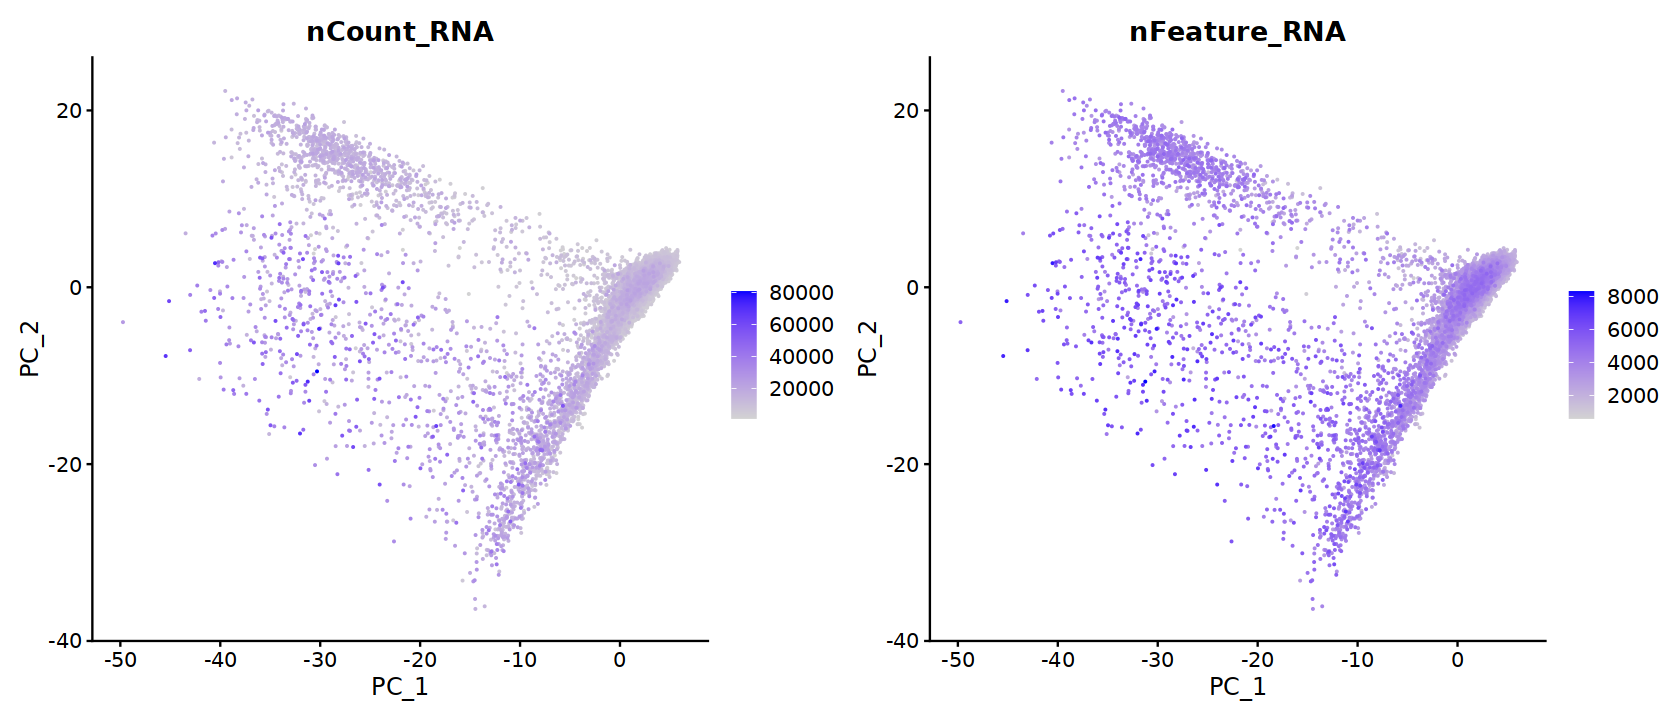

In [12]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
    features = c("nCount_RNA", "nFeature_RNA"), order = T)

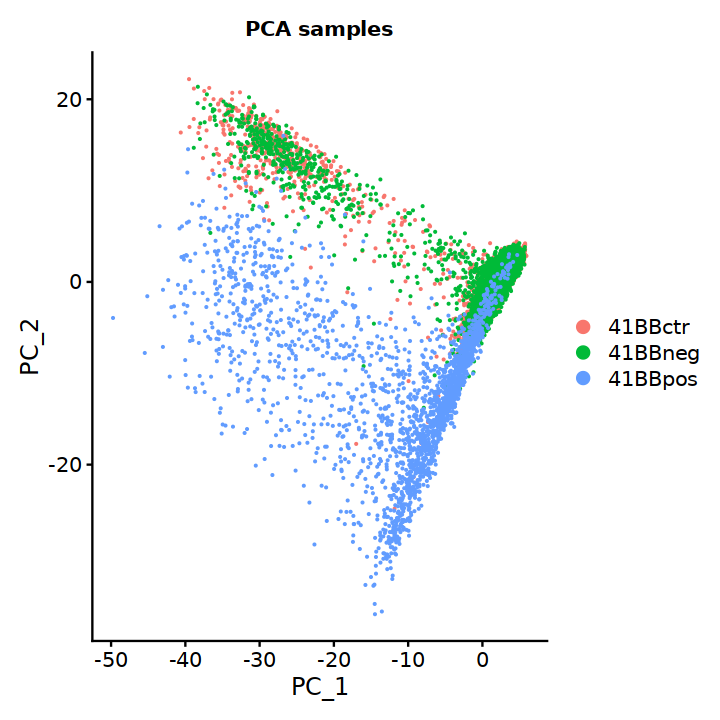

In [13]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
dp1 <- DimPlot(
  seurat_obj,
  reduction = "pca",
  group.by = "sample_id",
  pt.size = 0.1
) + ggtitle('PCA samples') + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))
dp1

In [15]:
unique(seurat_obj$sample_id)

[1] "41BBctr" "41BBneg" "41BBpos"

In [16]:
seurat_obj@meta.data <- seurat_obj@meta.data[c('orig.ident','nCount_RNA','nFeature_RNA',
                       'sample_org','sample_id','pct_mt','percent.ribo',
                       'doublet_score','doublet_pred','S.Score',
                       'G2M.Score','Phase', 'clusters')]

In [17]:
comp=20

In [18]:
seurat_obj <- RunUMAP(
  seurat_obj,
  dims = 1:comp,
  reduction = "pca",
  reduction.name = "umap",
  reduction.key = "UMAP_"
)

16:38:17 UMAP embedding parameters a = 0.9922 b = 1.112

16:38:17 Read 22119 rows and found 20 numeric columns

16:38:17 Using Annoy for neighbor search, n_neighbors = 30

16:38:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:38:19 Writing NN index file to temp file /scratch_tmp/34461493/RtmpxJDOHf/file1a9832844147e

16:38:19 Searching Annoy index using 1 thread, search_k = 3000

16:38:26 Annoy recall = 100%

16:38:26 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:38:28 Initializing from normalized Laplacian + noise (using irlba)

16:38:28 Commencing optimization for 200 epochs, with 952580 positive edges

16:38:53 Optimization finished



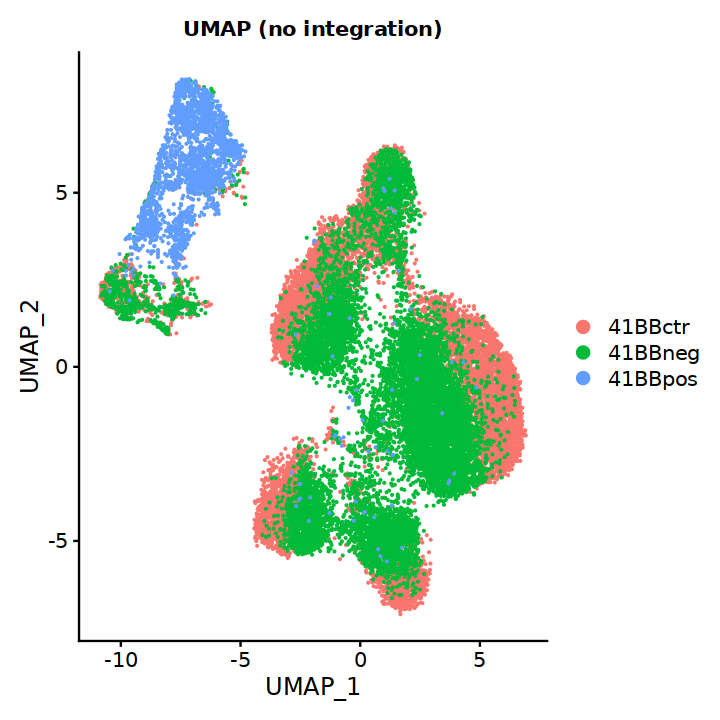

In [19]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  group.by = "sample_id",
  pt.size = 0.1
) + ggtitle('UMAP (no integration)') + 
     theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

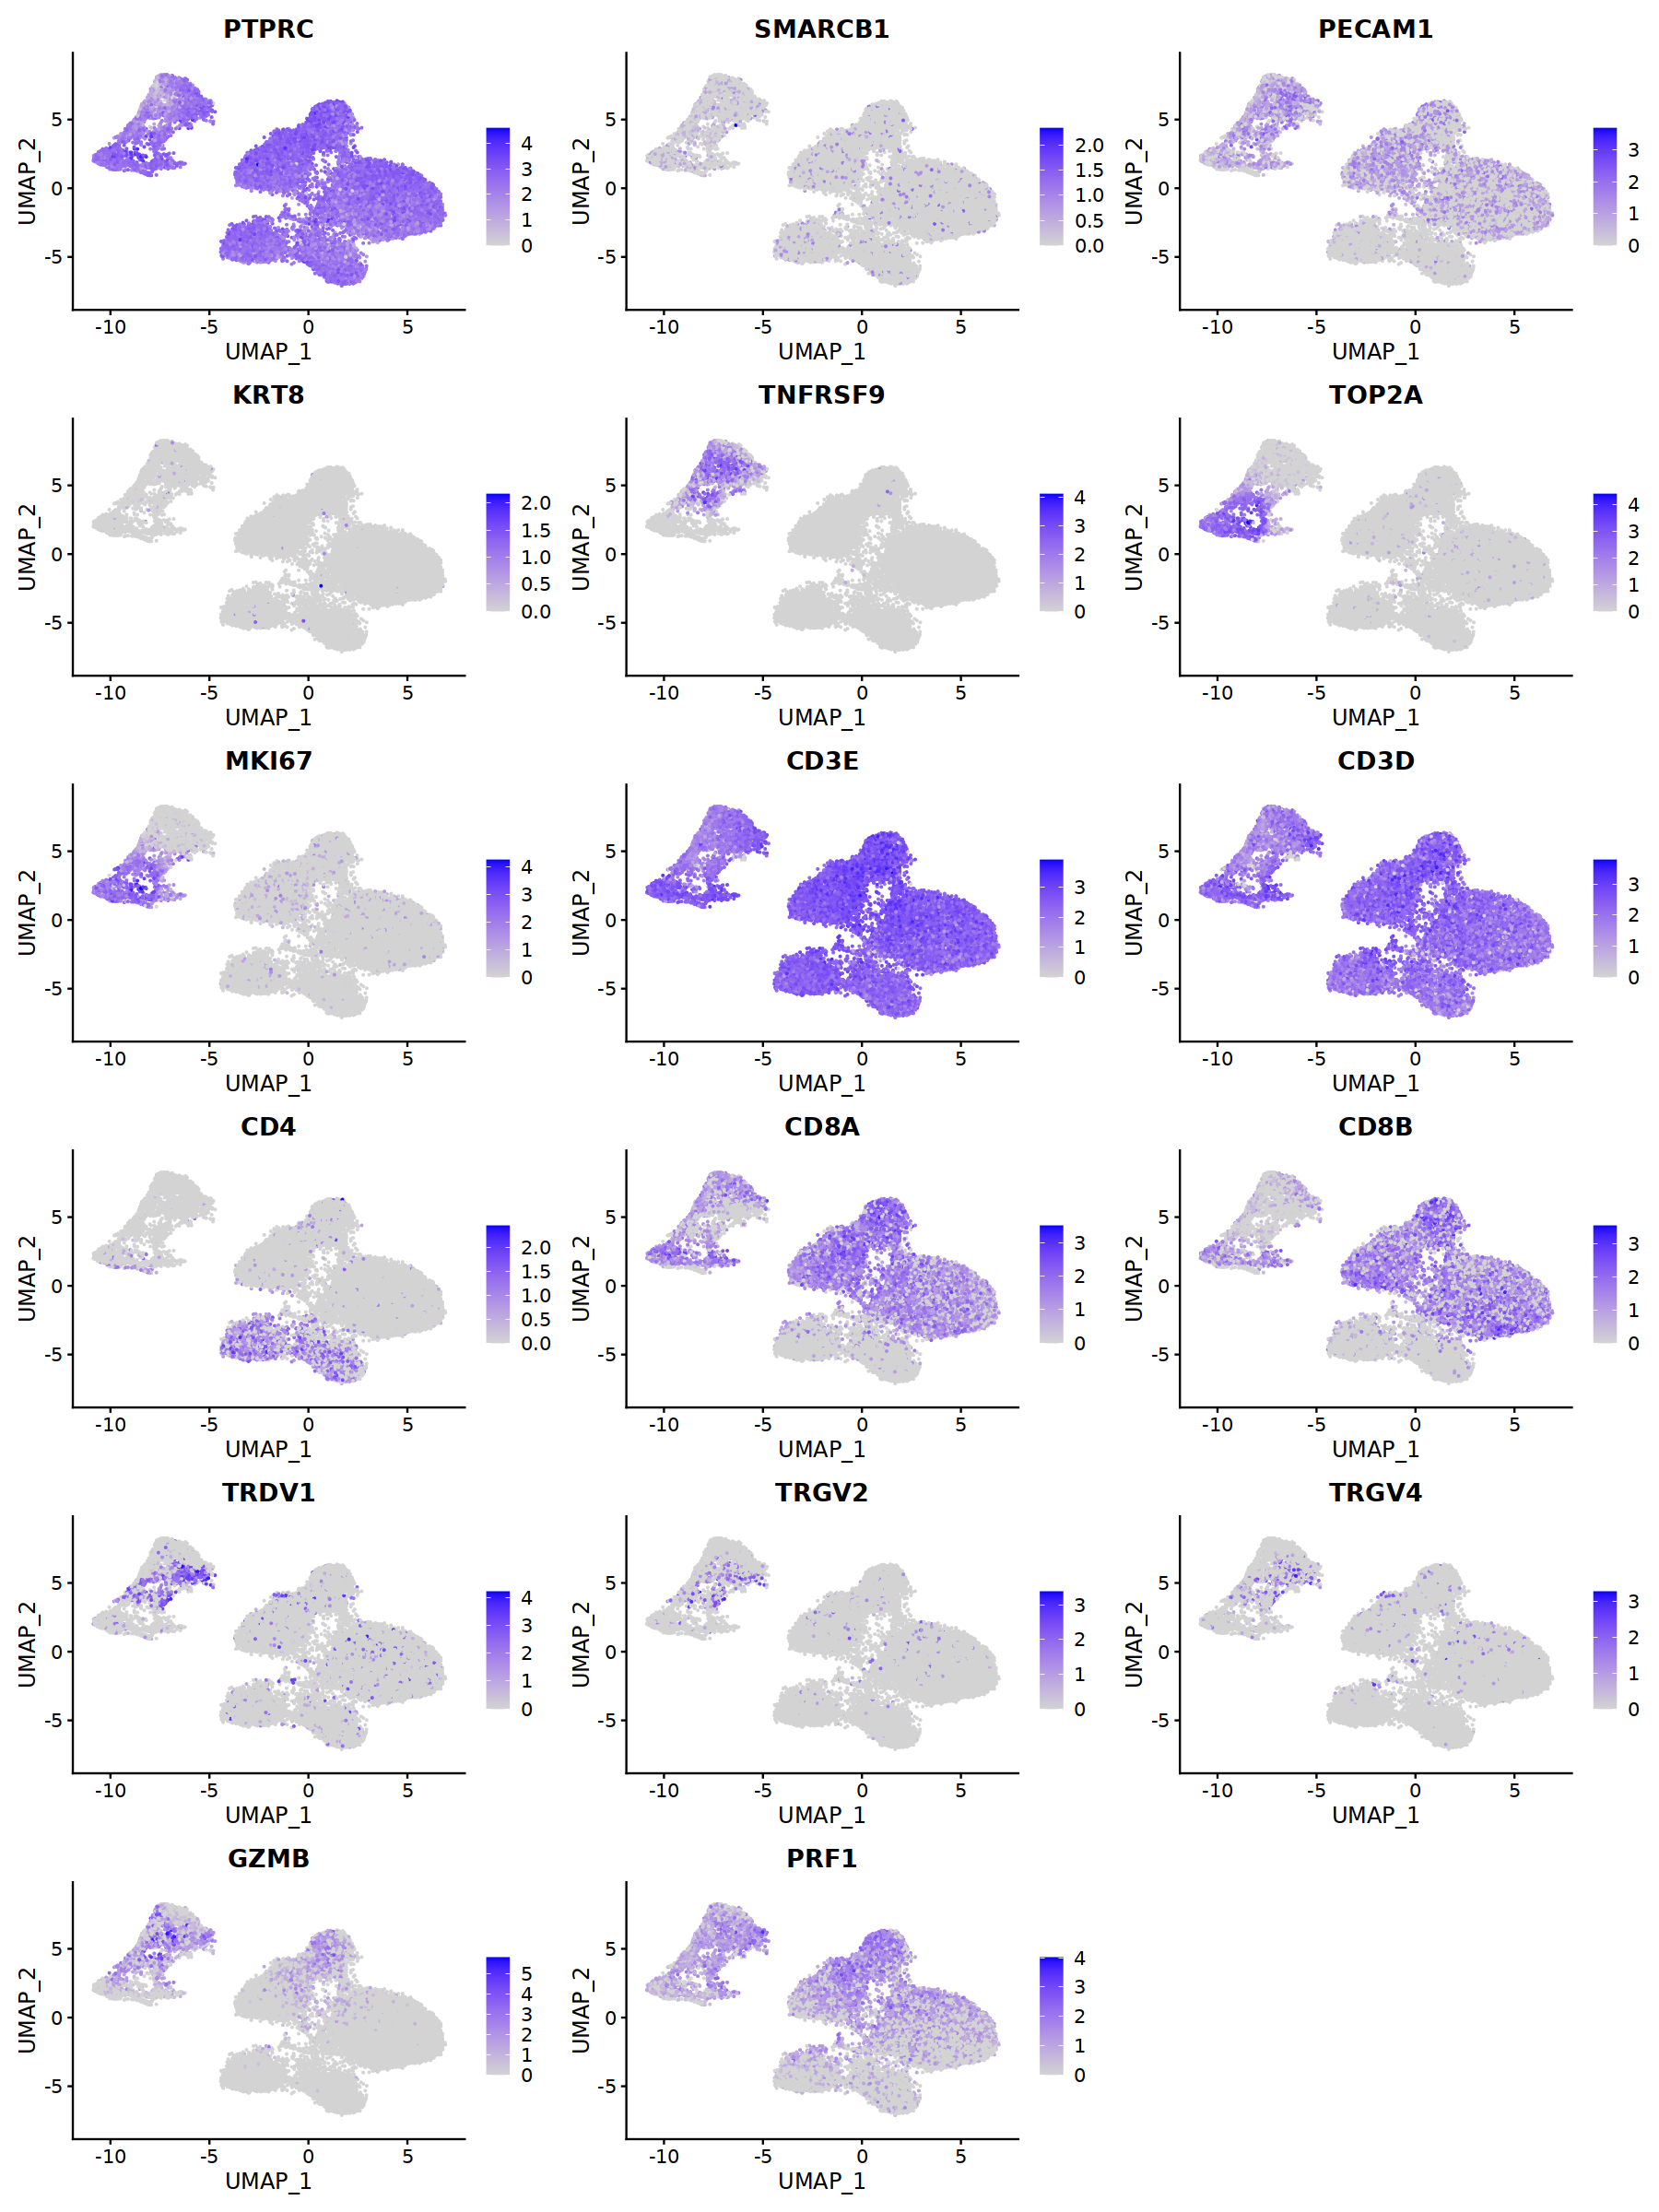

In [20]:
options(repr.plot.width = 15, repr.plot.height = 20, warn=-1,verbose = FALSE)

genes <- c("PTPRC","SMARCB1","PECAM1","KRT8","TNFRSF9","TOP2A","MKI67",
           "CD3E","CD3D","CD4","CD8A","CD8B","TRDV1","TRGV2","TRGV4",
           "GZMB","PRF1")

FeaturePlot(seurat_obj, reduction="umap", 
            feature=genes, ncol=3)

### Integration with Harmony

In [21]:
# make a copy of the PCA reduction
seurat_obj@reductions$pca_filt <- seurat_obj@reductions$pca

# Filter to the desired number of components according to elbow
seurat_obj@reductions$pca_filt@cell.embeddings <- seurat_obj@reductions$pca_filt@cell.embeddings[, c(1:comp)]
seurat_obj@reductions$pca_filt@feature.loadings <- seurat_obj@reductions$pca_filt@feature.loadings[, c(1:comp)]

In [22]:
seurat_obj <- RunHarmony(
  object = seurat_obj,
  reduction = "pca_filt",
  group.by.vars = "sample_id",
  assay.use = "RNA",
  project.dim = FALSE,
  reduction.save = "harmony"
)

Transposing data matrix

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [23]:
seurat_obj <- RunUMAP(
  seurat_obj,
  dims = 1:comp,
  reduction = "harmony",
  reduction.name = "umap",
  reduction.key = "UMAP_"
)

16:39:27 UMAP embedding parameters a = 0.9922 b = 1.112

16:39:27 Read 22119 rows and found 20 numeric columns

16:39:27 Using Annoy for neighbor search, n_neighbors = 30

16:39:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:39:29 Writing NN index file to temp file /scratch_tmp/34461493/RtmpxJDOHf/file1a9835772ffaa

16:39:29 Searching Annoy index using 1 thread, search_k = 3000

16:39:36 Annoy recall = 100%

16:39:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:39:38 Initializing from normalized Laplacian + noise (using irlba)

16:39:39 Commencing optimization for 200 epochs, with 966586 positive edges

16:40:03 Optimization finished



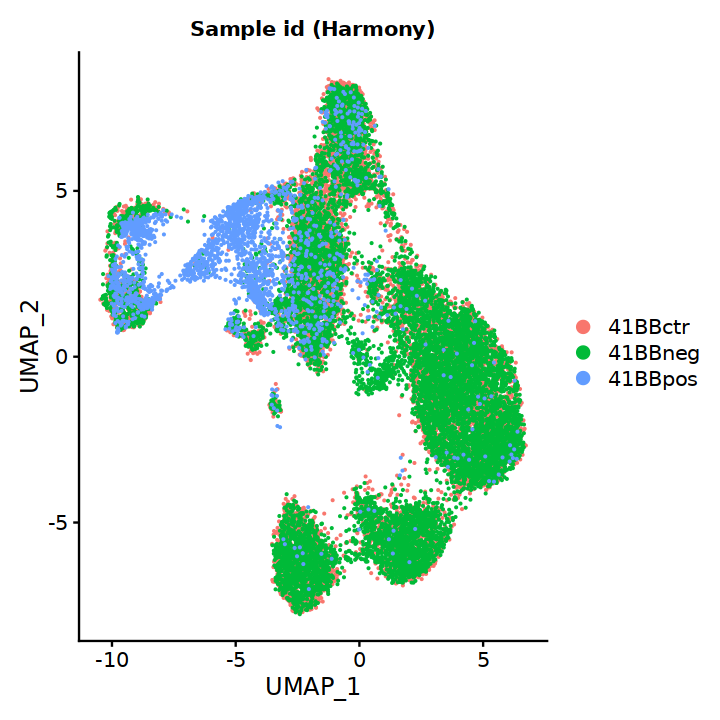

In [24]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
dpt <- DimPlot(
  seurat_obj,
  reduction = "umap",
  group.by = "sample_id",
  pt.size = 0.1
) + ggtitle('Sample id (Harmony)') + 
     theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

dpt 

## Clustering

In [25]:
# Find the K-nearest neighbors
seurat_obj <- FindNeighbors(seurat_obj, reduction = "harmony", dims = 1:comp)
# Find clusters at different resolutions
clusters_df <- cluster_diff_resolutions(
  seurat_obj = seurat_obj,
  min_resolution = 0.1,
  max_resolution = 1.0,
  step = 0.05
)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22119
Number of edges: 715999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9557
Number of communities: 5
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22119
Number of edges: 715999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9455
Number of communities: 7
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22119
Number of edges: 715999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9368
Number of communities: 9
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22119
Number of edges: 715999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9285
Number of communities: 9
Elapsed time: 4 seconds
Modularity Optim

In [26]:
list_plots <- lapply(unique(clusters_df$resolution), function(x) {
  p <- add_reso_results(seurat_obj, clusters_df, resolution=x)
  umap <- DimPlot(p, reduction = "umap", 
                  group.by=glue::glue("seurat_clusters")) +
    labs(title=glue::glue("Resolution {x}"))
  return(umap)
})

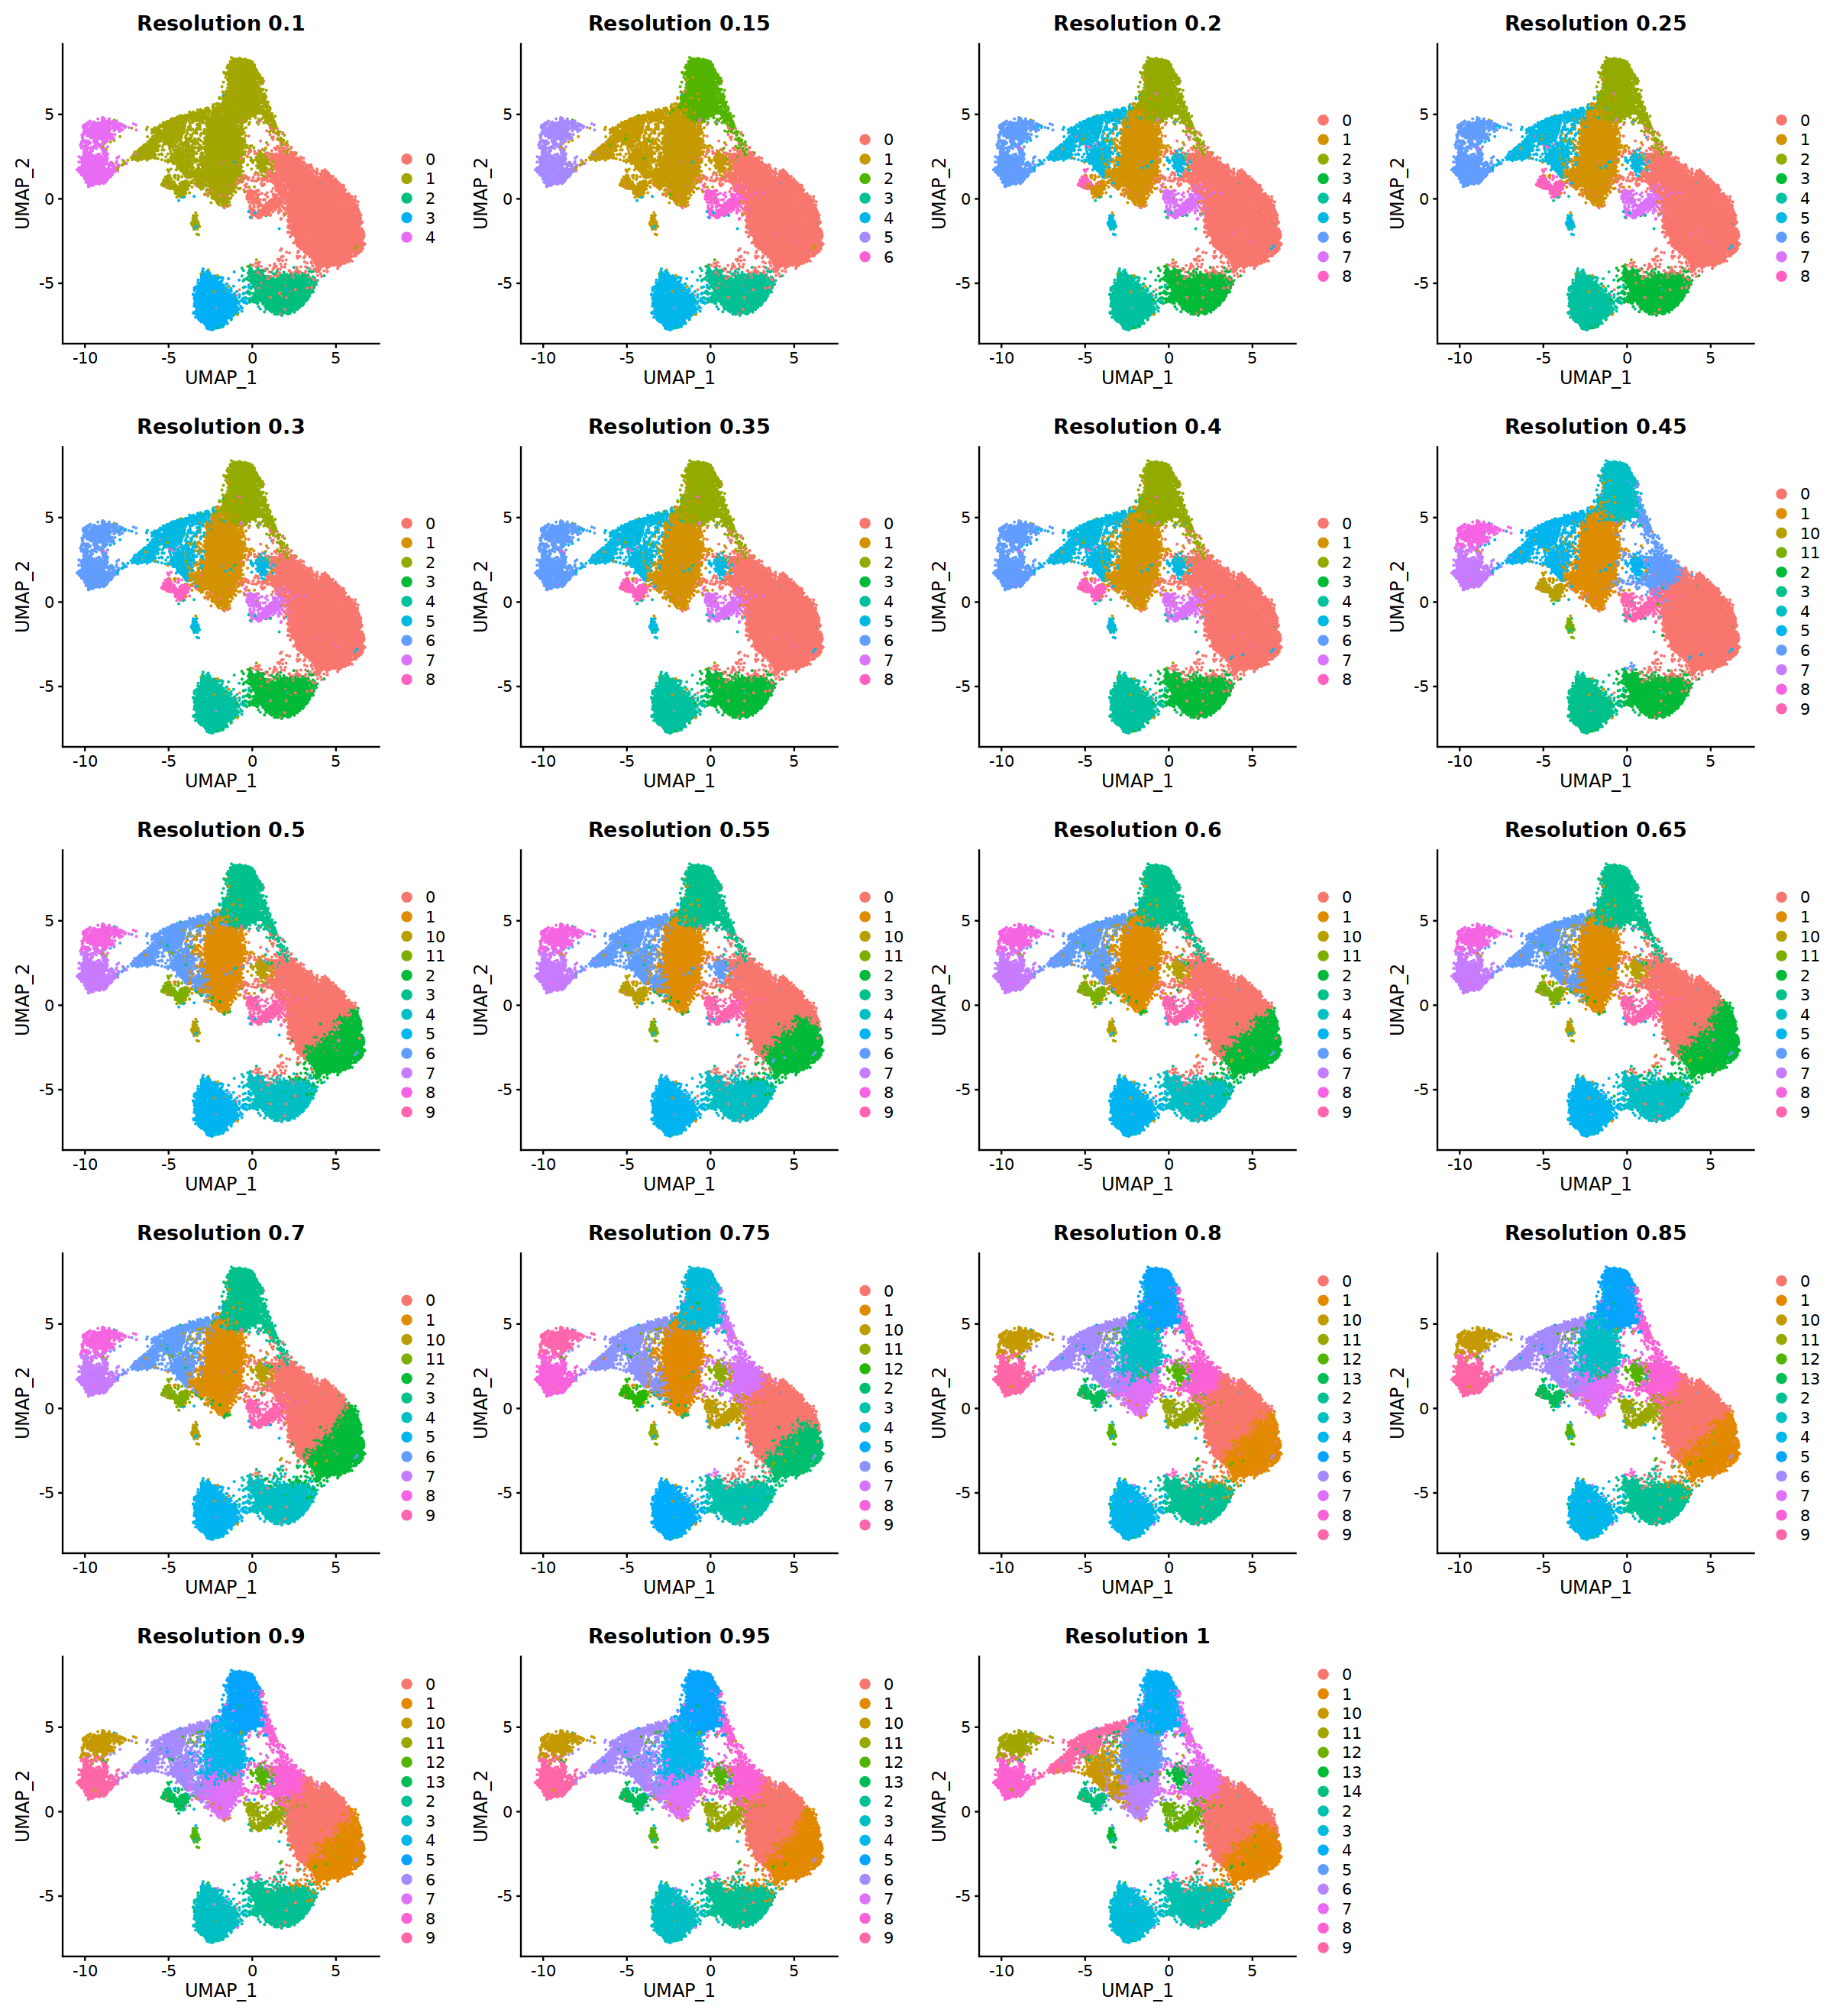

In [27]:
options(repr.plot.width = 20, repr.plot.height = 22, warn=-1,verbose = FALSE)
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol=4,
                   nrow=5)
cp

In [28]:
tcell_markers = c("CD3E","CD3D", "CD4", "CD8A","CD8B","ANXA1",
                  "NKG7", "GNLY","PRF1","ICOS","FOXP3","CXCR3", 
                  "GATA3","RORA","SELL", "LEF1", "NCAM1", "FCGR3A",
                  "TRDC", "TRGC1","TRGC2", "KIT", "CD34","ZNF683", 
                  "CX3CR1", "ITGAE")

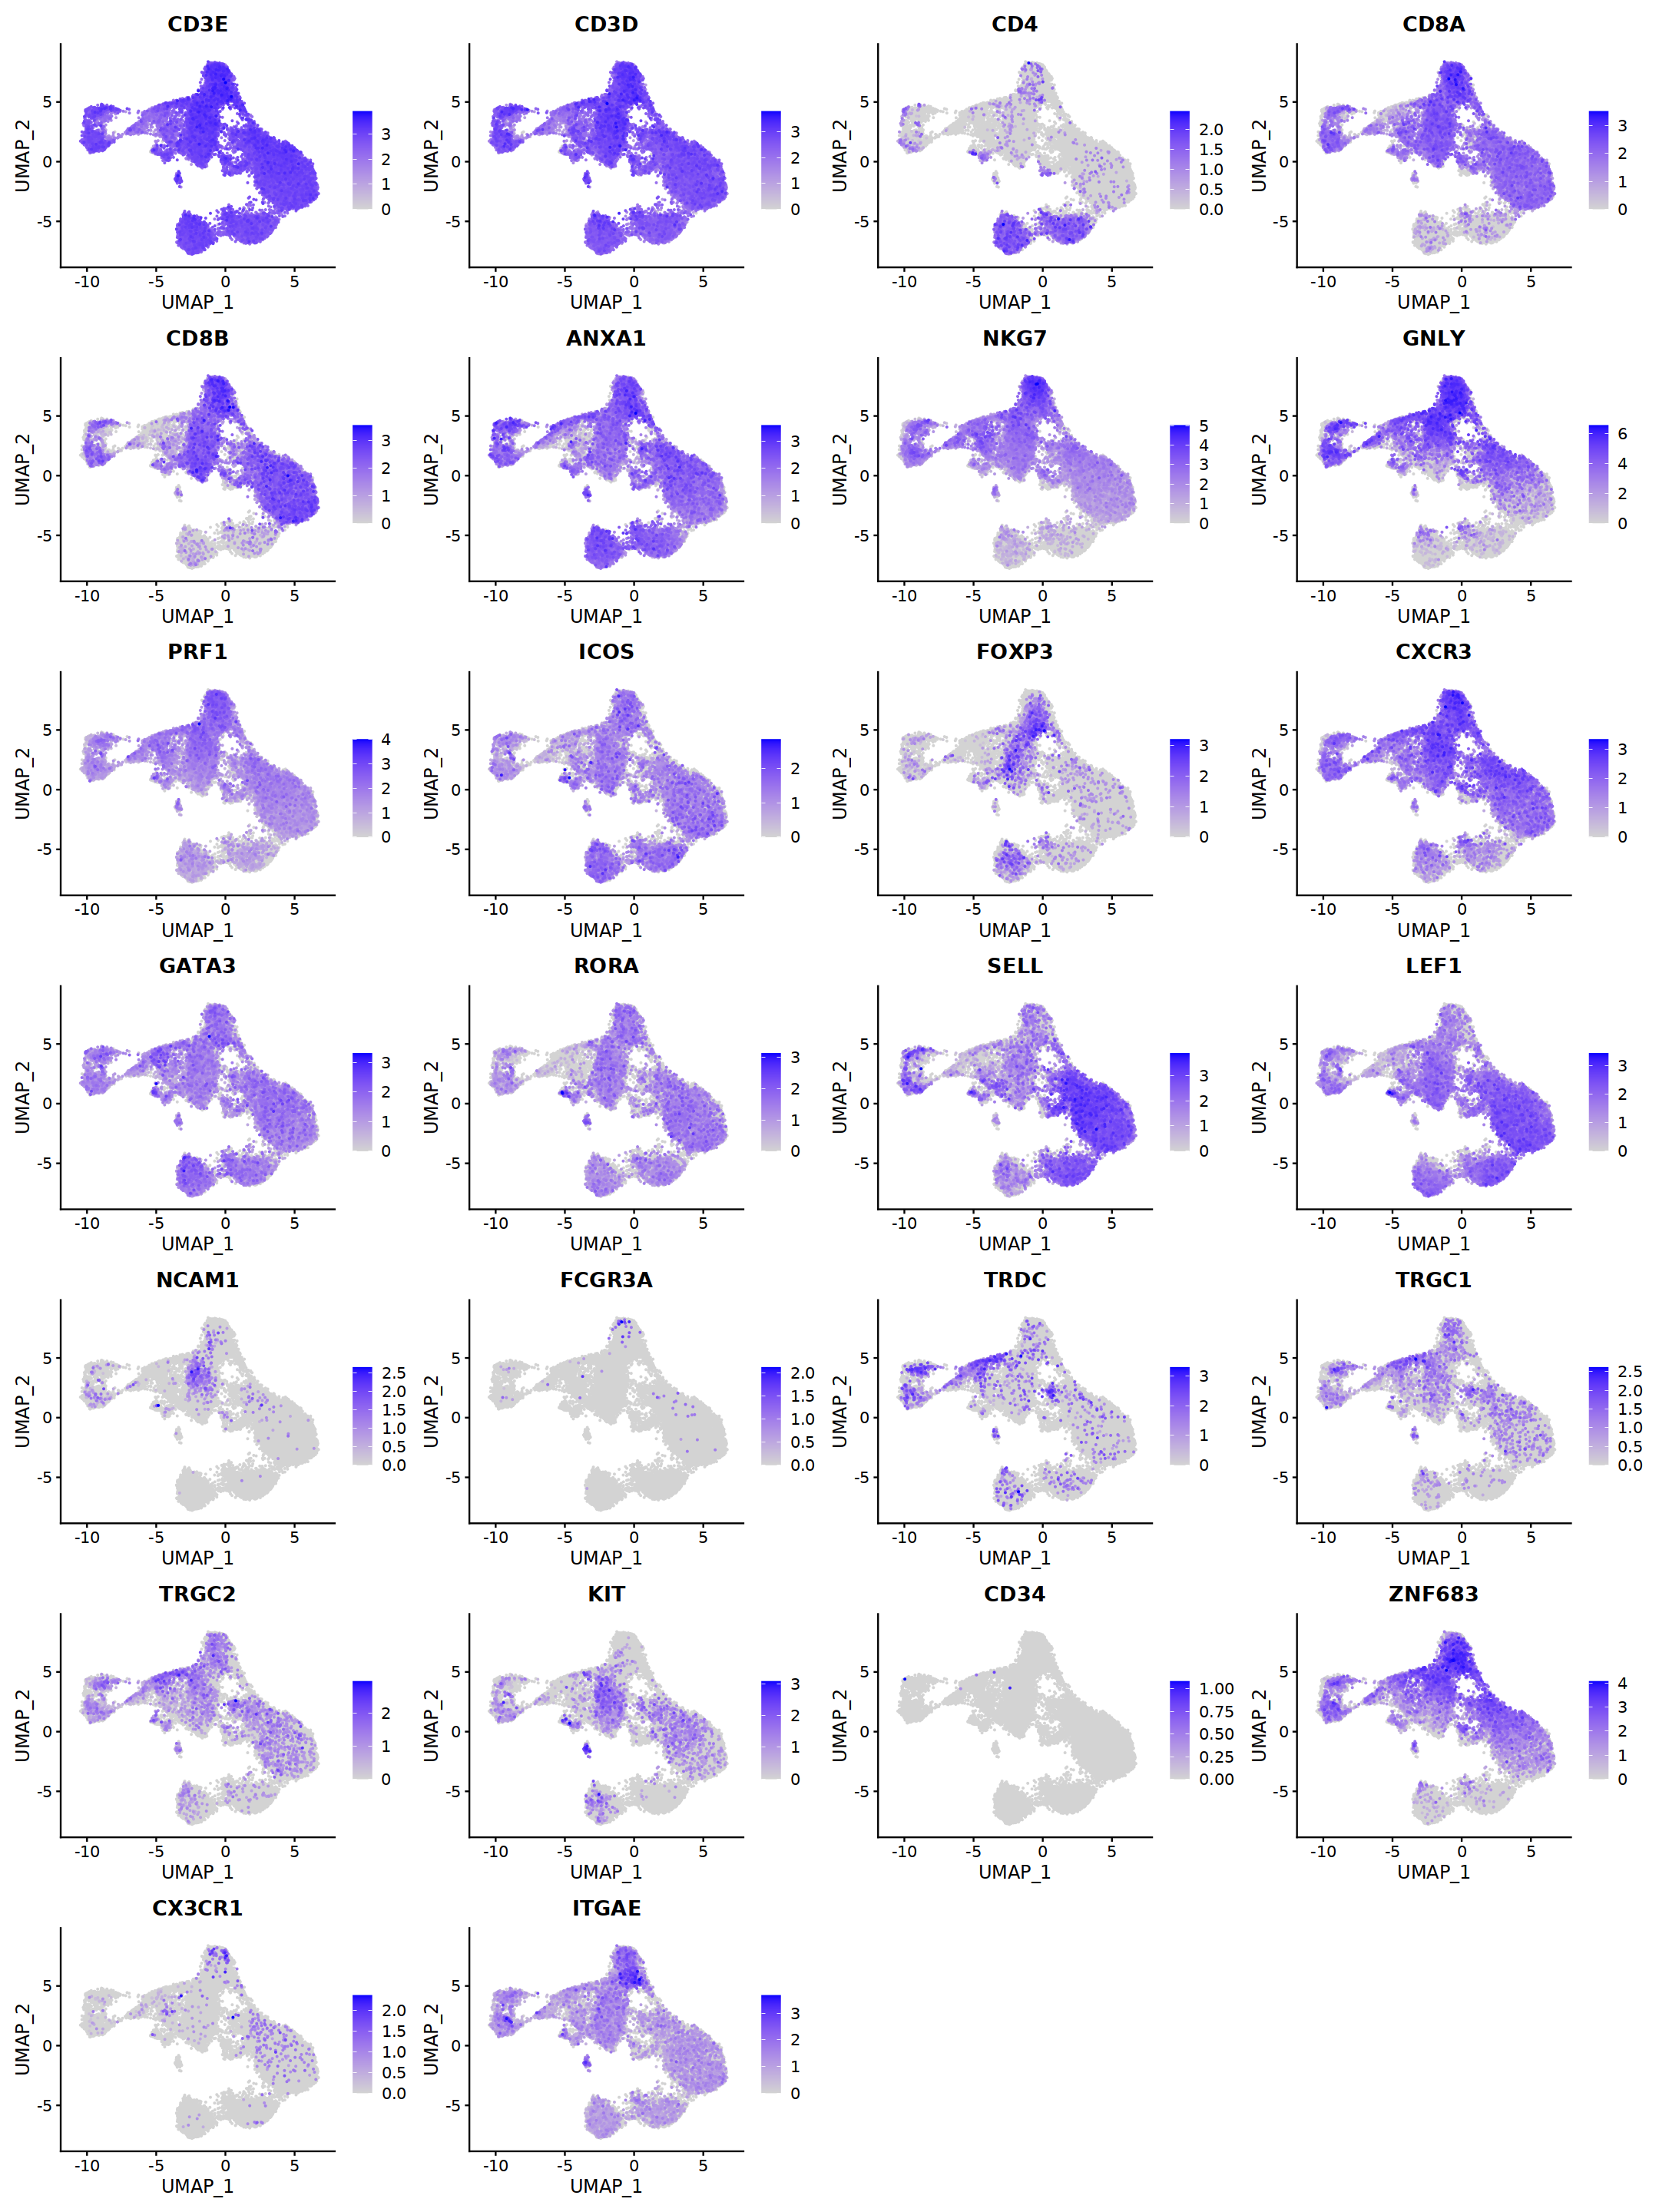

In [29]:
options(repr.plot.width = 18, repr.plot.height = 24, warn=-1,verbose = FALSE)
FeaturePlot(seurat_obj, reduction = "umap", 
            feature=tcell_markers, 
            order = TRUE, ncol=4)

### Resolution chosen

In [30]:
reso=0.7

In [31]:
seurat_obj <- FindClusters(seurat_obj, resolution = reso)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22119
Number of edges: 715999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8673
Number of communities: 12
Elapsed time: 4 seconds


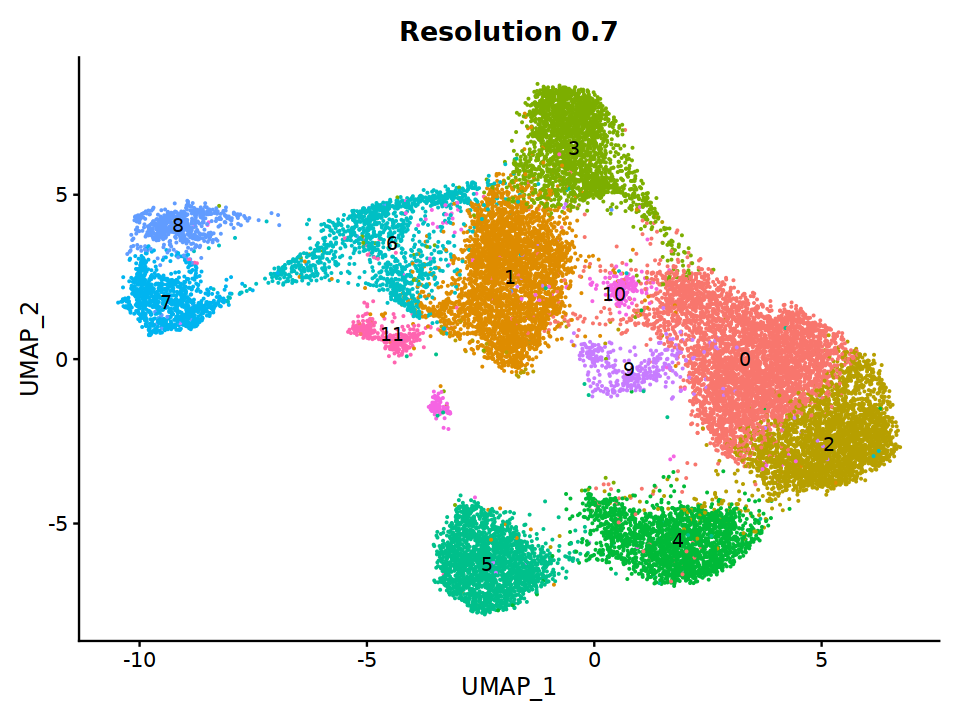

In [32]:
options(repr.plot.width = 8, repr.plot.height = 6, warn=-1,verbose = FALSE)
pc <- DimPlot(seurat_obj, reduction = "umap", label = T)+ NoLegend() +
  labs(title=glue("Resolution {reso}")) + theme(plot.title = element_text(hjust = 0.5))
pc

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 343
Number of edges: 9170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8823
Number of communities: 2
Elapsed time: 0 seconds


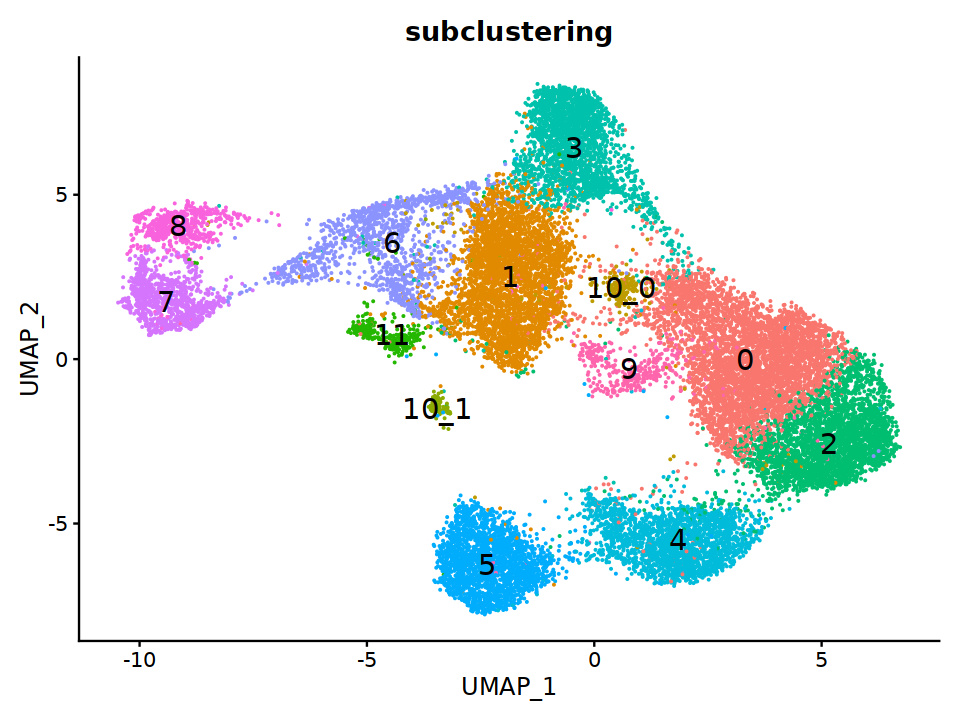

In [33]:
seurat_obj <- FindSubCluster(
  seurat_obj,
  "10",
  graph.name = "RNA_snn",
  subcluster.name = "subclustering",
  resolution = 0.2,
  algorithm = 1
)

pc <- DimPlot(seurat_obj, reduction = "umap", 
        group.by = "subclustering", label = TRUE, label.size = 6) + NoLegend()
pc

In [34]:
seurat_obj <- SetIdent(seurat_obj, value=seurat_obj@meta.data$subclustering)

In [35]:
rna.markers <- FindAllMarkers(seurat_obj, min.pct=0.1, logfc.threshold=0.1, 
                              random.seed=0, max.cells.per.ident=2000, 
                              only.pos=TRUE)

Calculating cluster 0

Calculating cluster 10_1

Calculating cluster 3

Calculating cluster 2

Calculating cluster 5

Calculating cluster 11

Calculating cluster 10_0

Calculating cluster 4

Calculating cluster 1

Calculating cluster 7

Calculating cluster 6

Calculating cluster 8

Calculating cluster 9



In [36]:
rna.markers <- rna.markers %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC))

In [37]:
write.csv(rna.markers, 
          here(glue("{annot}/{robj_dir}/4.0.0-Integration_Exp2.csv")), 
          row.names=TRUE)

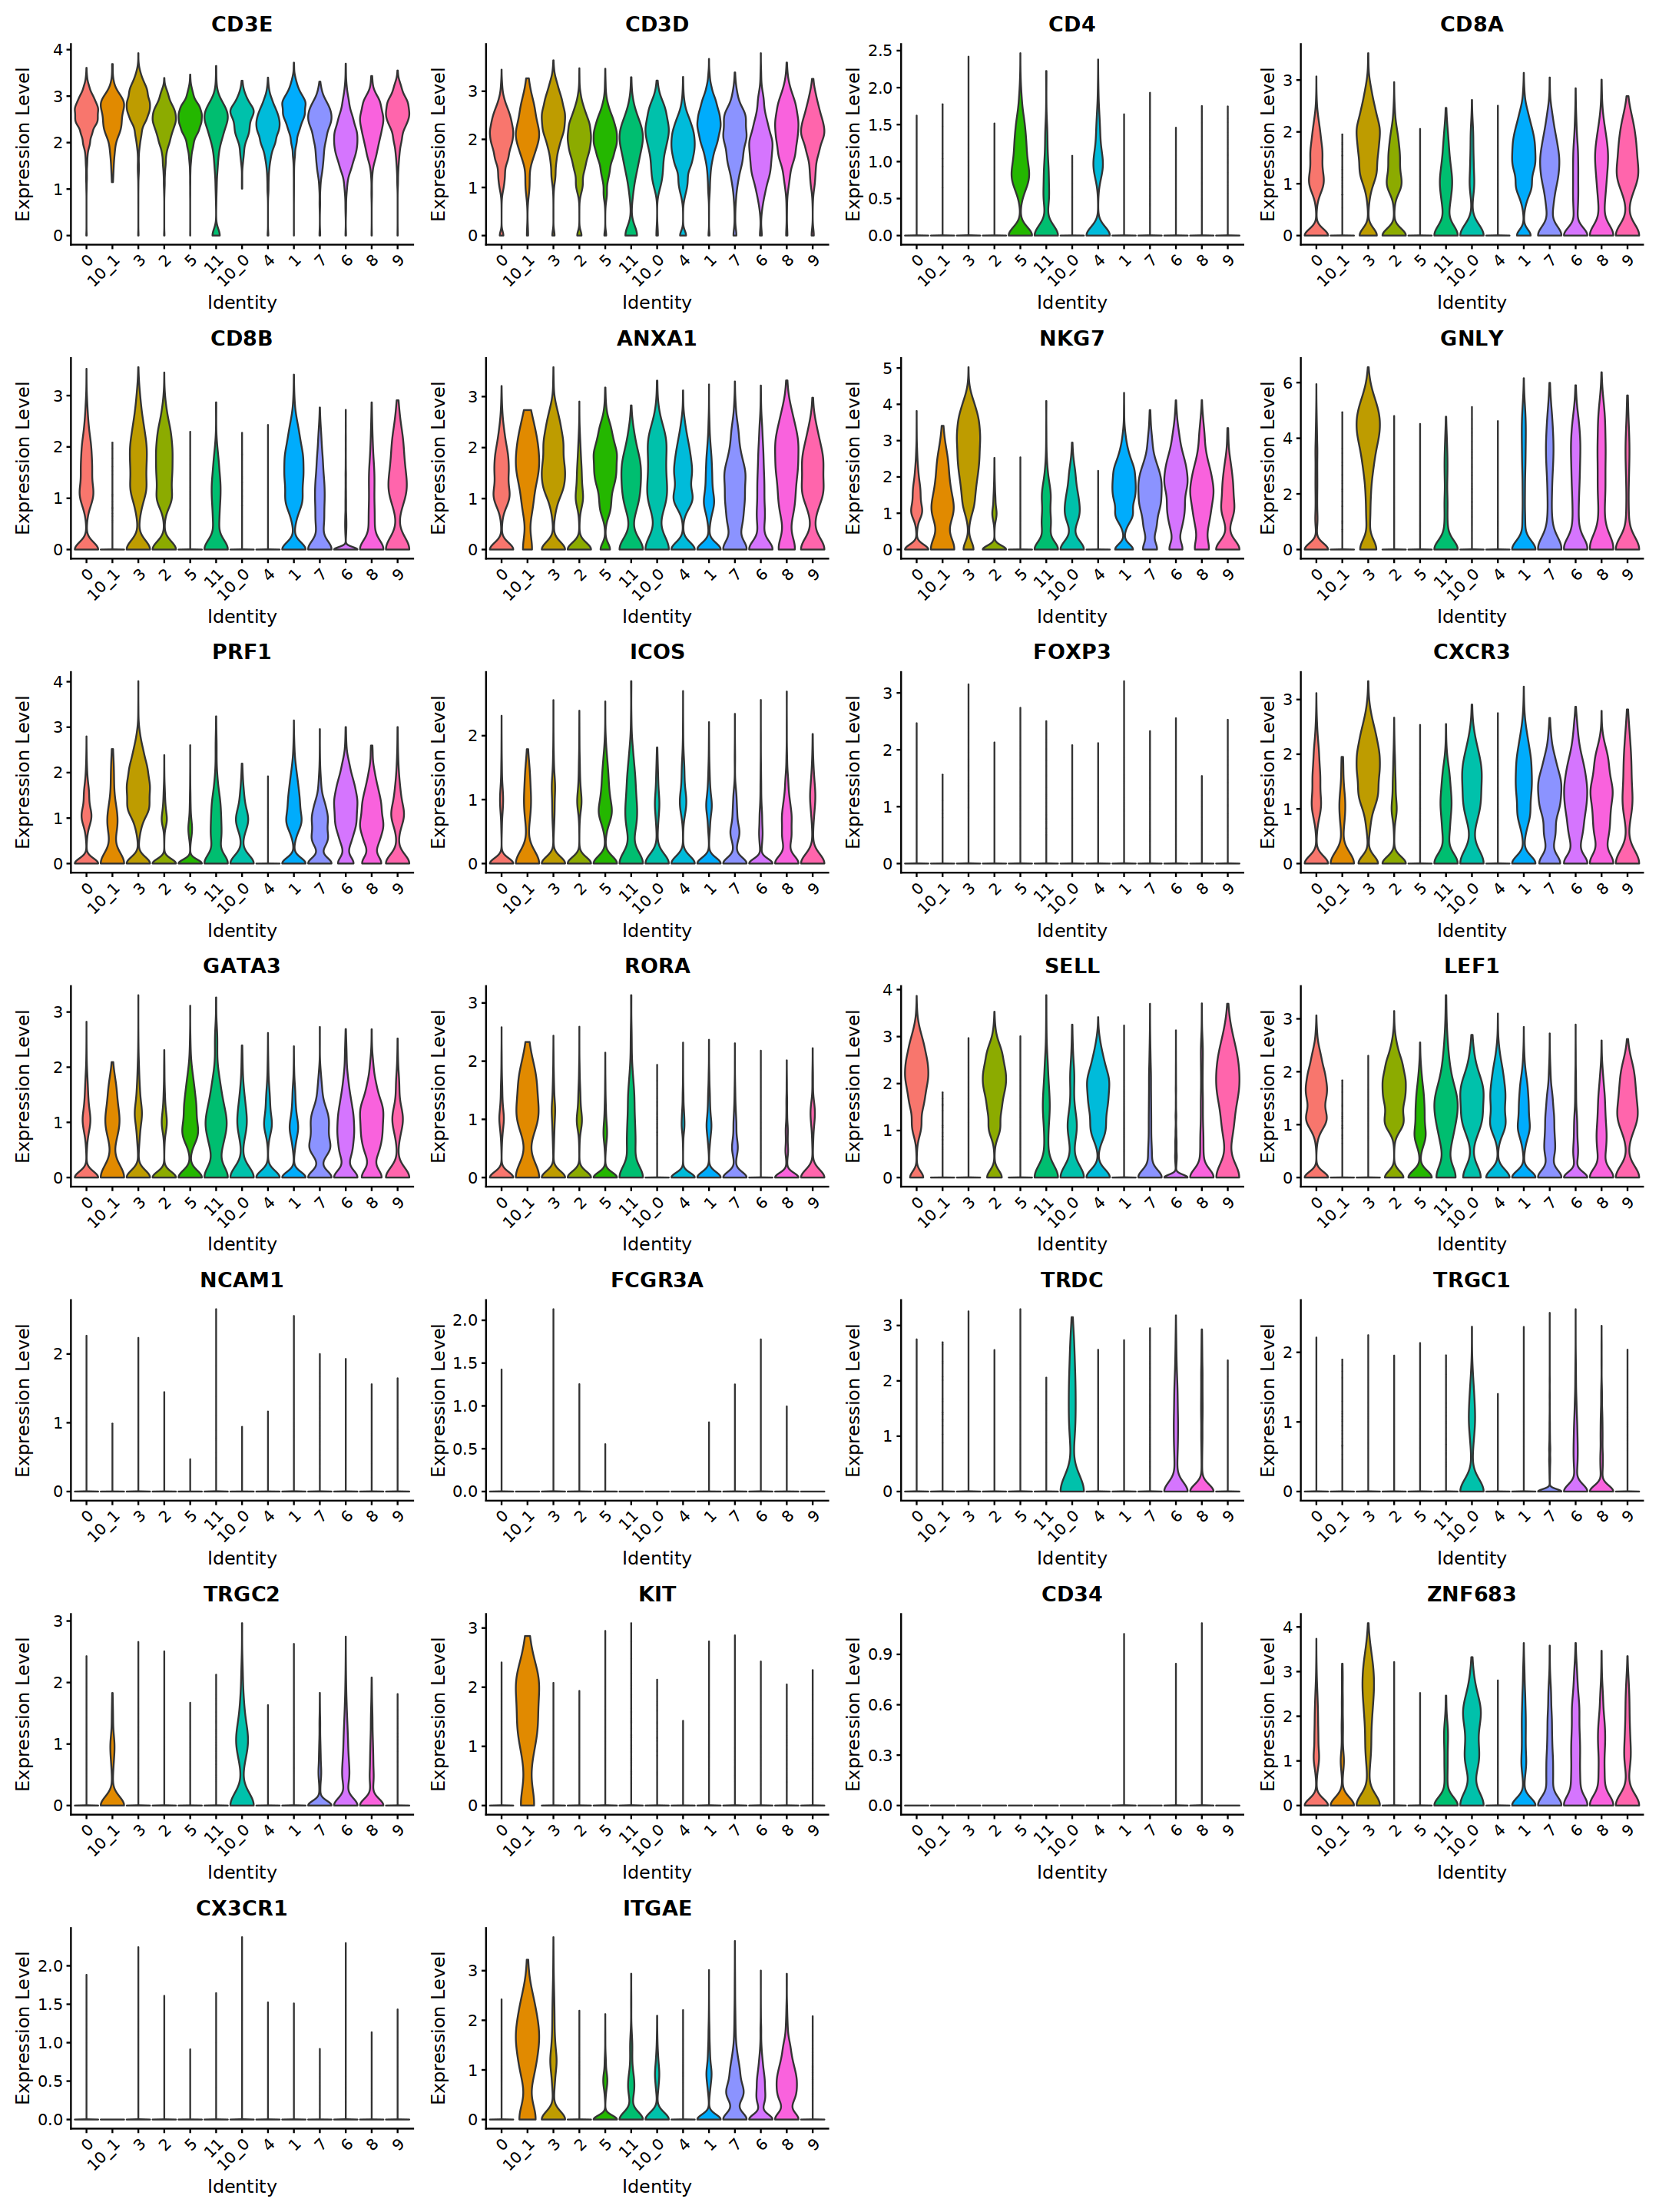

In [38]:
options(repr.plot.width = 18, repr.plot.height = 24, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, pt.size = 0,
            feature=tcell_markers, 
             ncol=4)

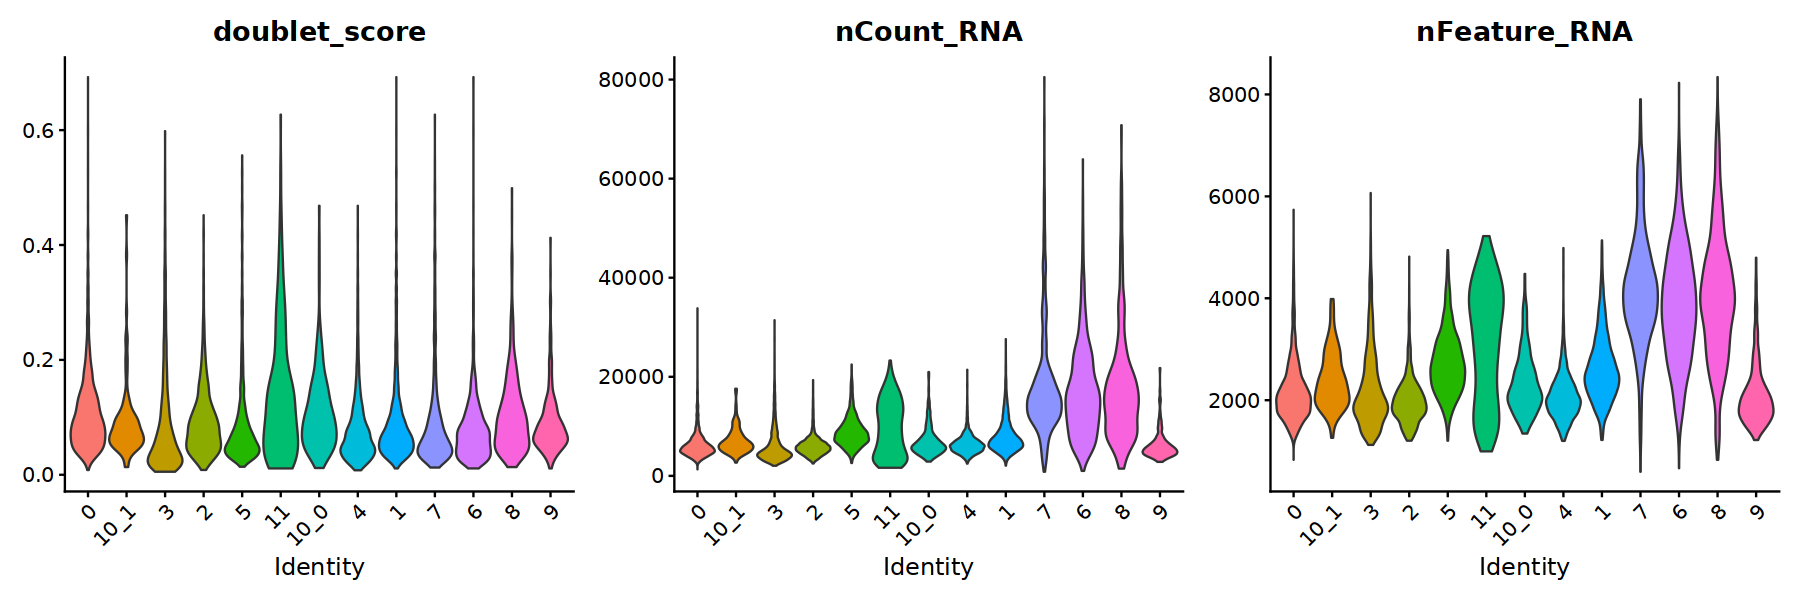

In [39]:
options(repr.plot.width = 15, repr.plot.height = 5, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,feature=c("doublet_score", "nCount_RNA", "nFeature_RNA"), 
            ncol=3, pt.size = 0)

Cluster 11 looks like doublets inluding CD4 and CD8 cells

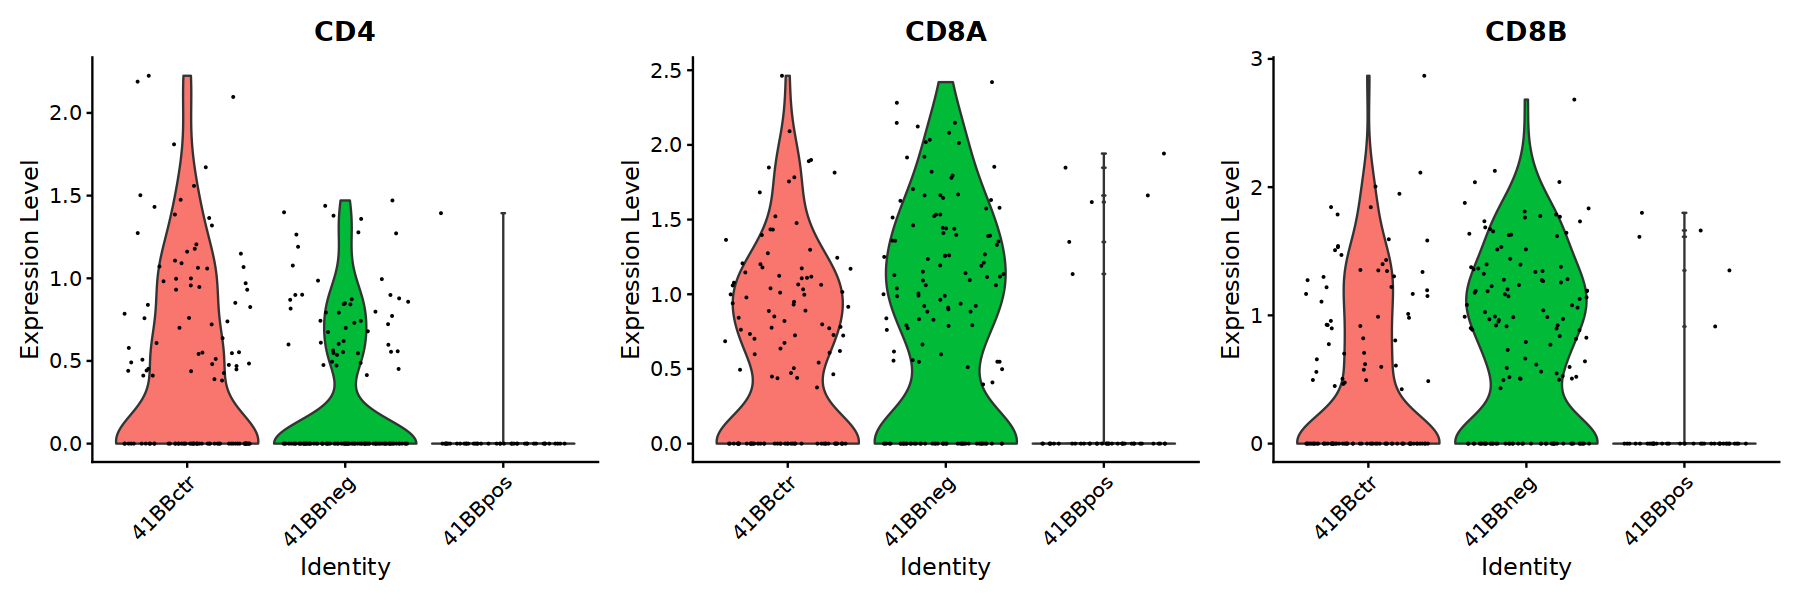

In [40]:
options(repr.plot.width = 15, repr.plot.height = 5, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,feature=c("CD4", "CD8A", "CD8B"), 
            group.by="sample_id" ,ncol=3, idents =c("11"))

In [42]:
c <- 11

rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene     
PDE7B1     4.067797e-36 1.5715745  0.660 0.311 1.142970e-31 11      PDE7B    
PHACTR21   2.699734e-26 1.4663199  0.593 0.310 7.585713e-22 11      PHACTR2  
ATXN11     1.092690e-35 1.4375605  0.813 0.487 3.070240e-31 11      ATXN1    
AHI1       8.164669e-18 1.4095309  0.413 0.194 2.294109e-13 11      AHI1     
PDE3B1     2.392152e-70 1.3059010  0.970 0.913 6.721469e-66 11      PDE3B    
SIPA1L1    3.117789e-29 1.2325000  0.753 0.437 8.760364e-25 11      SIPA1L1  
PTPRJ1     6.409098e-35 1.2257376  0.743 0.382 1.800828e-30 11      PTPRJ    
CHST111    2.797220e-40 1.1669233  0.833 0.528 7.859628e-36 11      CHST11   
PRKCA1     8.577762e-39 1.1551178  0.830 0.531 2.410179e-34 11      PRKCA    
SOS11      6.432251e-57 1.1318332  0.947 0.742 1.807334e-52 11      SOS1     
LINC019341 1.390278e-30 1.1211990  0.723 0.403 3.906404e-26 11      LINC01934
ATP8B4     9.906372e-27 1.0696545  0.613 0.317 2.783492e-22 11      ATP8B4   
PACS11     4.267149e-48 1.0216070  0.867 0.602 1.198984e-43 11      PACS1    
ZBTB202    9.139315e-52 1.0160603  0.933 0.741 2.567965e-47 11      ZBTB20   
ZDHHC141   1.656048e-32 1.0049577  0.563 0.253 4.653164e-28 11      ZDHHC14  
CBLB1      1.270624e-31 0.9963901  0.920 0.696 3.570200e-27 11      CBLB     
FUT8       1.713620e-26 0.9872389  0.843 0.618 4.814930e-22 11      FUT8     
ZFAND3     6.394791e-32 0.9844000  0.707 0.388 1.796808e-27 11      ZFAND3   
DLEU2      1.258048e-15 0.9837534  0.680 0.448 3.534863e-11 11      DLEU2    
PRKCH1     8.915395e-38 0.9779784  0.943 0.769 2.505048e-33 11      PRKCH

In [43]:
seurat_obj$clusters <- Idents(seurat_obj)

In [44]:
default_colors <- scales::hue_pal()(length(levels(seurat_obj)))

# Create a named vector associating clusters with colors
cluster_colors <- setNames(default_colors, levels(seurat_obj))

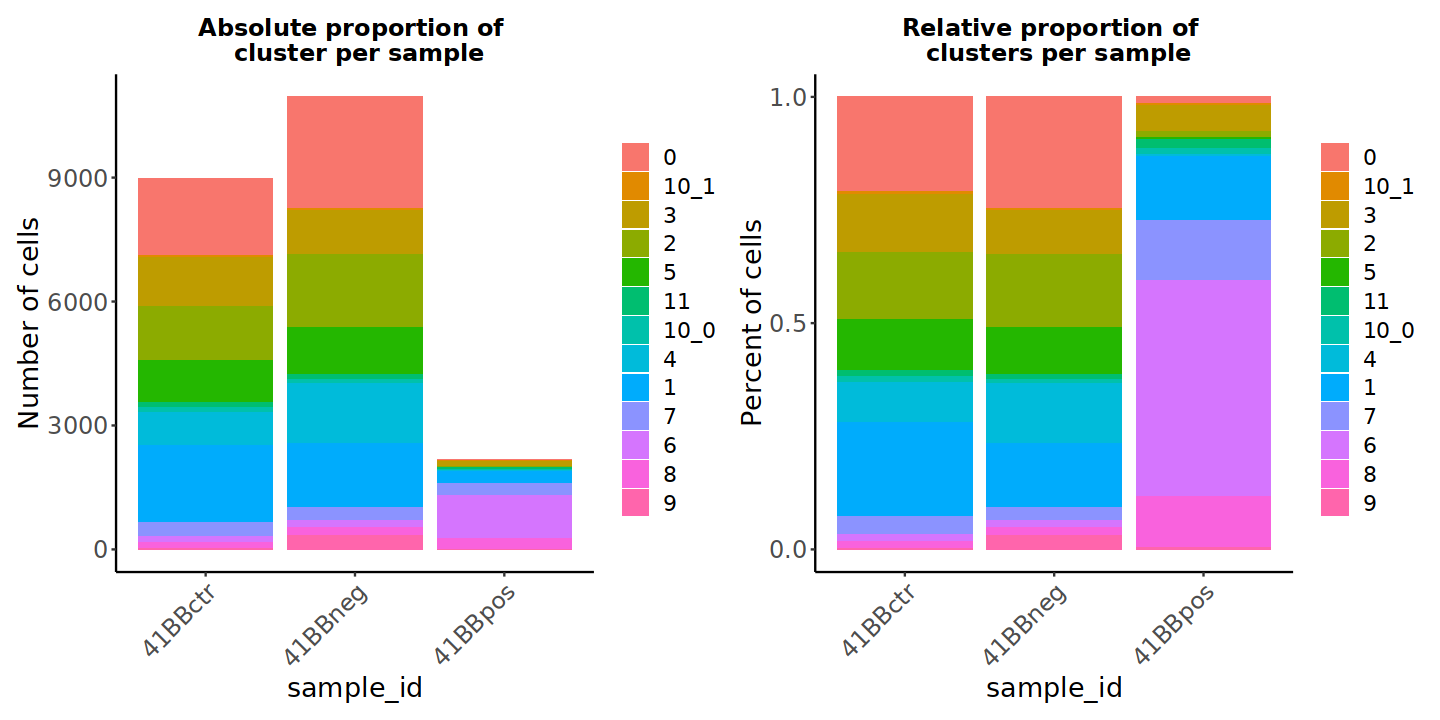

In [45]:
options(repr.plot.width = 12, repr.plot.height = 6, warn=-1,verbose = FALSE)
rel <- dittoBarPlot(seurat_obj, "clusters", group.by = "sample_id",
                    color.panel = cluster_colors,retain.factor.levels=T) + 
       labs(title = "Relative proportion of \n clusters per sample") +
           theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
                 axis.text.x = element_text(size = 14),  
                 axis.text.y = element_text(size = 14),
                 text = element_text(size = 16),)
abs <- dittoBarPlot(seurat_obj, "clusters", group.by = "sample_id", 
             scale = "count", color.panel = cluster_colors,retain.factor.levels=T) + 
            labs(title ="Absolute proportion of \n cluster per sample") + 
     theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
           axis.text.x = element_text(size = 14),  
           axis.text.y = element_text(size = 14),
           text = element_text(size = 16),)
abs + rel

In [46]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
pf <- DimPlot(seurat_obj, group.by="sample_id")

In [47]:
pv <- VlnPlot(seurat_obj, features= "TNFRSF9",  group.by="sample_id") + 
    labs(title ="TNFRSF9 (41BB)") + 
     theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
           axis.text.x = element_text(size = 14),  
           axis.text.y = element_text(size = 14),
           text = element_text(size = 16))

In [48]:
fp <- FeaturePlot(seurat_obj, features = "TNFRSF9", order=T, reduction="umap")

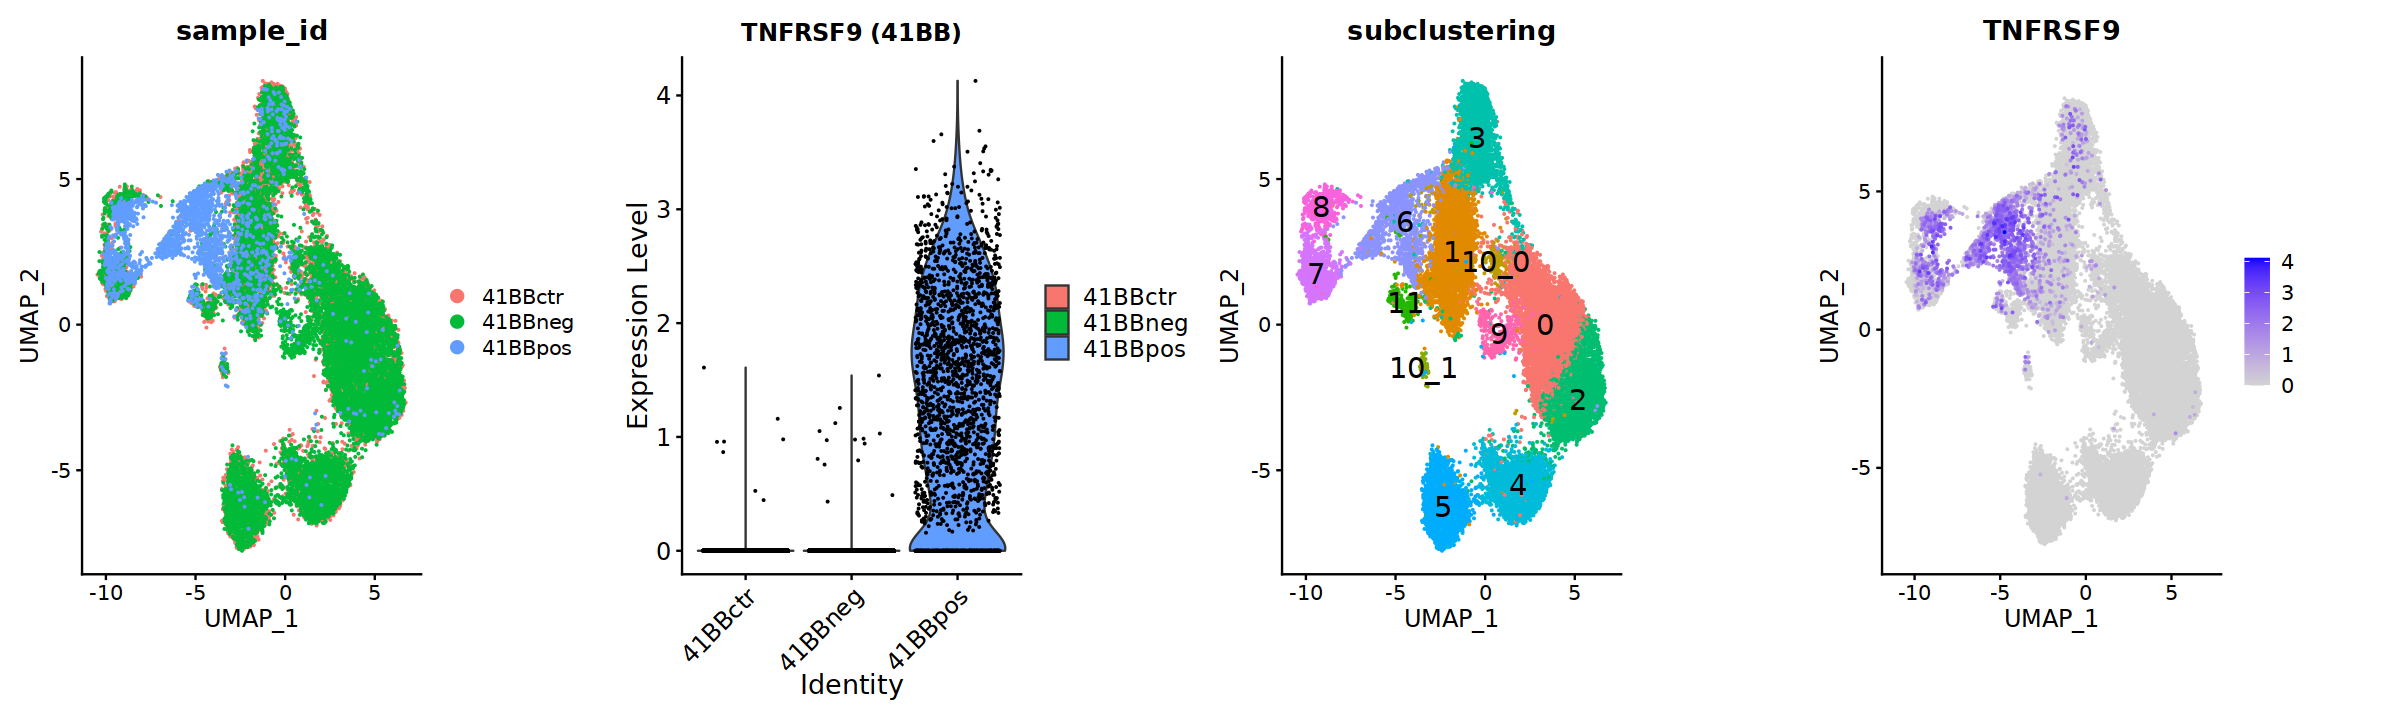

In [49]:
options(repr.plot.width = 20, repr.plot.height =6, warn=-1,verbose = FALSE)
# show plots
cp <- cowplot::plot_grid(plotlist = list(pf,pv,pc,fp),
                   align = "hv",
                   axis = "trbl",
                   ncol = 4,
                   nrow = 1)
cp

## Save

In [50]:
seurat_obj@meta.data <- seurat_obj@meta.data[c('orig.ident','nCount_RNA','nFeature_RNA',
                       'sample_id','pct_mt','percent.ribo',
                       'doublet_score','doublet_pred','S.Score',
                       'G2M.Score','Phase', 'clusters')]

In [51]:
saveRDS(seurat_obj, here(glue("{annot}/{robj_dir}/4.0.0-Integration_Exp2.rds")))

## Session Info

In [52]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] scran_1.22.1                scater_1.22.0              
 [3] scuttle_1.4.0               SingleCellExperiment_1.16.0
 [5] SummarizedExperiment_1.24.0 Biobase_2.54.0             
 [7] GenomicRanges_1.46.1        GenomeInfoDb_1.30.1        
 [9] IRanges_2.28.0    